# **PHYS 481 - Assignment 2**
## **Josh Houghton**
### ***Note: Before Running the code cells for the third problem, the creek_pic.tif file must be uploaded to your  workspace***

In [ ]:
# Importing all Necessary Packages

import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial, sqrt, pi, exp
import cv2
from google.colab.patches import cv2_imshow

# **Introduction**


In this assignment, I was tasked with exploring several topics in relation to randomness, probability theory, entropy, and lossless image compression. Overall, I completed three assignment problems. 

The first problem investigated some properties of randomness and probability, specifically related to uniform sampling. Using Python I constructed some programs that involved calculating the outcomes of increasingly large numbers of dice rolls. In doing so, the hope was that the results of my programs would give some insight towards the outcome of better understanding how probability distributions work, and how they can be modelled by well known distributions for large enough uniform samples.

The next problem investigated something known as macrostate probability. Essentially, when you have a system that is comprised of many states, each of which are a random variable, you can define something called a macrostate. The macrostate of a system is defined (as specified in the name) only by the macroscopic properties of the system. Hence, you can achieve the same macrostate of a system in mulitiple ways, with different arrangements of the microscopic properties of said system. This is a very important part of the theory behind thermodynamics and statistical mechanics. In the assignment problem, I used Python to complete some analysis into the macrostate probability of a coin. The main outcome of this problem was to produce some results that would give insight into how macrostate probability works, and how it can be modelled.

The third and final problem was in regard to lossless image compression. The idea behind this problem, specifically it's relation to the field of physics, is that we can find the entropy of an image similarly to how we can define the entropy of a system in thermodynamics. Overall, the main outcome of this problem was to, using Python, explore lossless image compression while employing something known as Huffman coding. From our results, the hope was that we could get a deeper insight into topics regarding image file types, data storage, and entropy.

Overall, throughout this assignment write-up, I touch on how I went about tackling each and every one of these challenges, as well as the resulting data that was found. To condlude, I come back to the original outcomes that were outlined in this intro, and give some context to how the results responded to them.








# **Problem 2.1.1 - Check for Uniform Sampling**

## **Problem 2.1.1 Methodology**

In this problem, I was tasked with creating a program that would calculate the results of rolling a dice $N$ times, and find how the probabilities of rolling 1 through 6 scaled as a function of $N$. After this, I was also tasked with plotting the error of all of these probabilities as a function of $N$ on a log-log plot.

For this problem, although I was not required to, I plotted the first set of results, just to create a better visualization for analysis. Therefore, I have two cells of code.

The first cell uses a for loop to iterate through many values of $N$, so we can see how our results scale with $N$. Within each iteration of $N$, I employed NumPy's random.choice function to produce a list of our results, which are the results of each dice roll. Then, I calculate the experimental probabilities of rolling each number on the dice for that N, by counting the number of times each dice number (face) appears in the results, and dividing it by the total number of rolls, $N$. After this is complete, I simply append each experimental probability to their corresponding lists. That is the bulk of the program, and all that is left is to plot our results. The program creates subplots for each of the six probabilities, each one containing a simple plot of the experimental probability result for each iteration of $N$ as a function of $N$. I also added the horizontal line $P_i=\frac{1}{6}$ to each graph, in order to visualize the theoretical probability.

The second cell is almost identical in structure, apart from a couple differences within the for loop. Once again, for each iteration of $N$, the experimental probabilities of all the dice faces are calculated. Next, the error is calculated as the absolute value of the difference between the theoretical probability, and the experimental probability calculated for that iteration. The absolute value is necessary, as the next step is to take the natural log of each of these errors, and as we know $\ln(x)$ is undefined for $x\le 0$. Although the negative values of error are taken care of using the absolute value, I found that a problem still persisted when an iteration's error was zero, which obviously arose due to the natural log of zero also being undefined. To work around this, I simply added conditional statements before calculating the natural log of each error, to check whether or not the corresponding error was equal to zero. If it was, I simply appended zero to the corresponding list, otherwise, the natural log was calculated and appended to the list instead. For each iteration, the natural log of $N$ was also calculated, and these values were stored in another list. All that was left to do after this loop was completed, was to plot our results in subplots, using the same methods as the previous cell. For each of the six plots, I used NumPy's polyfit function to calculate the slope and intercept of a line that was fitted to the corresponding data, and then used these to not only plot the line, but also print each of the slopes on the graph. Additionally, I calculated the average slope of all six graphs for the purpose of analysis.

It is important to note that for both of these cells, I skipped over plotting $N\lt 100$ just to better visualize the results, but in testing, the results for those values were still in line with what is expected.



## **Problem 2.1.1 Code**

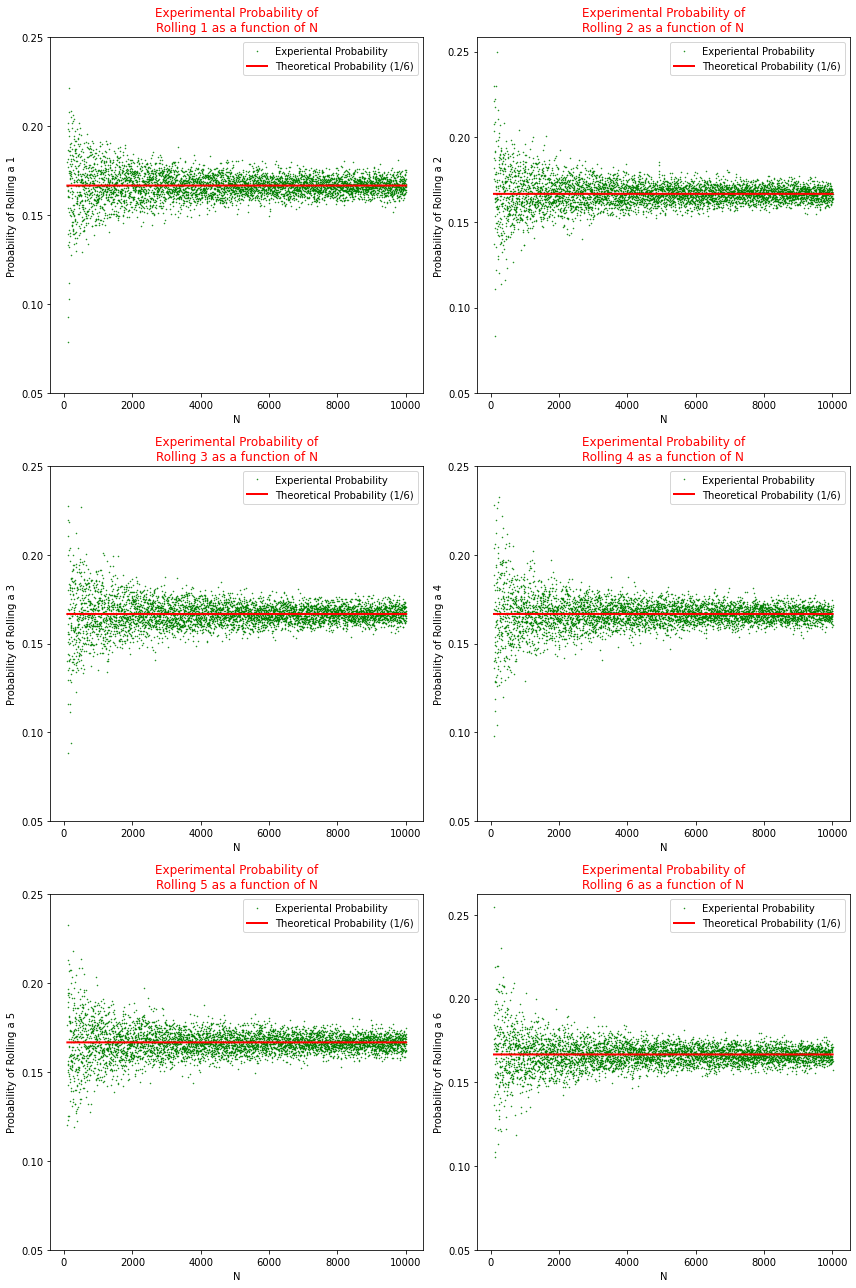

In [ ]:
# This cell calculate the outcomes of rolling more and more dice. Using the 
# results, it then plots the experimental probability of rolling each number
# as a function of the number of rolls, N.

# setting up figure of subplots
fig, ax = plt.subplots(3,2,figsize=(12,18))
[axi.set_axis_off() for axi in ax.ravel()]

# Initializes empty lists to keep track of N and the number of each dice roll
# result. Also initializes the dice itself and the probability for each face.
N_list = []
ones, twos, threes, fours, fives, sixes = [],[],[],[],[],[]
dice = [1,2,3,4,5,6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Initializes a for loop that iterates over many N values
for N in range(100,10010,2):

  # Uses numpy random to simulate N dice rolls, and collects results in a list
  result = list(np.random.choice( dice , size = N , p = prob))

  # calculates the experimental probability of each number being rolled, as the
  # number of times that number was rolled over the total rolls for this iteration
  p1 = result.count(1) / N
  p2 = result.count(2) / N
  p3 = result.count(3) / N
  p4 = result.count(4) / N
  p5 = result.count(5) / N
  p6 = result.count(6) / N

  # appends the previously calculated probabilities to their corresponding lists,
  # and updates the list for N, so we can plot them later
  ones += [p1]
  twos += [p2]
  threes += [p3]
  fours += [p4]
  fives += [p5]
  sixes += [p6]  
  N_list += [N]


# Plotting instructions for each of our experimental probabilities. Also adds a 
# line to each plot at p = 1/6 so we can visualize the theoretial probability
graphs = [ones, twos, threes, fours, fives, sixes]
for i in range(1,7):
  theor = [1/6] * len(graphs[i-1])
  ax = fig.add_subplot(3, 2, i)
  ax.plot(N_list,graphs[i-1], 'go', markersize =0.5, label = "Experiental Probability")
  ax.plot(N_list,theor,'red',linewidth=2, label="Theoretical Probability (1/6)")
  ax.set_yticks(np.arange(0.05,0.30,0.05))
  plt.ylim=(0.05,0.25)
  plt.xlabel("N")
  plt.ylabel("Probability of Rolling a "+str(i))
  plt.title("Experimental Probability of\nRolling "+str(i)+" as a function of N",fontsize=12,color='red')
  plt.legend()
  plt.tight_layout()

plt.show()


Average Slope is: -0.539


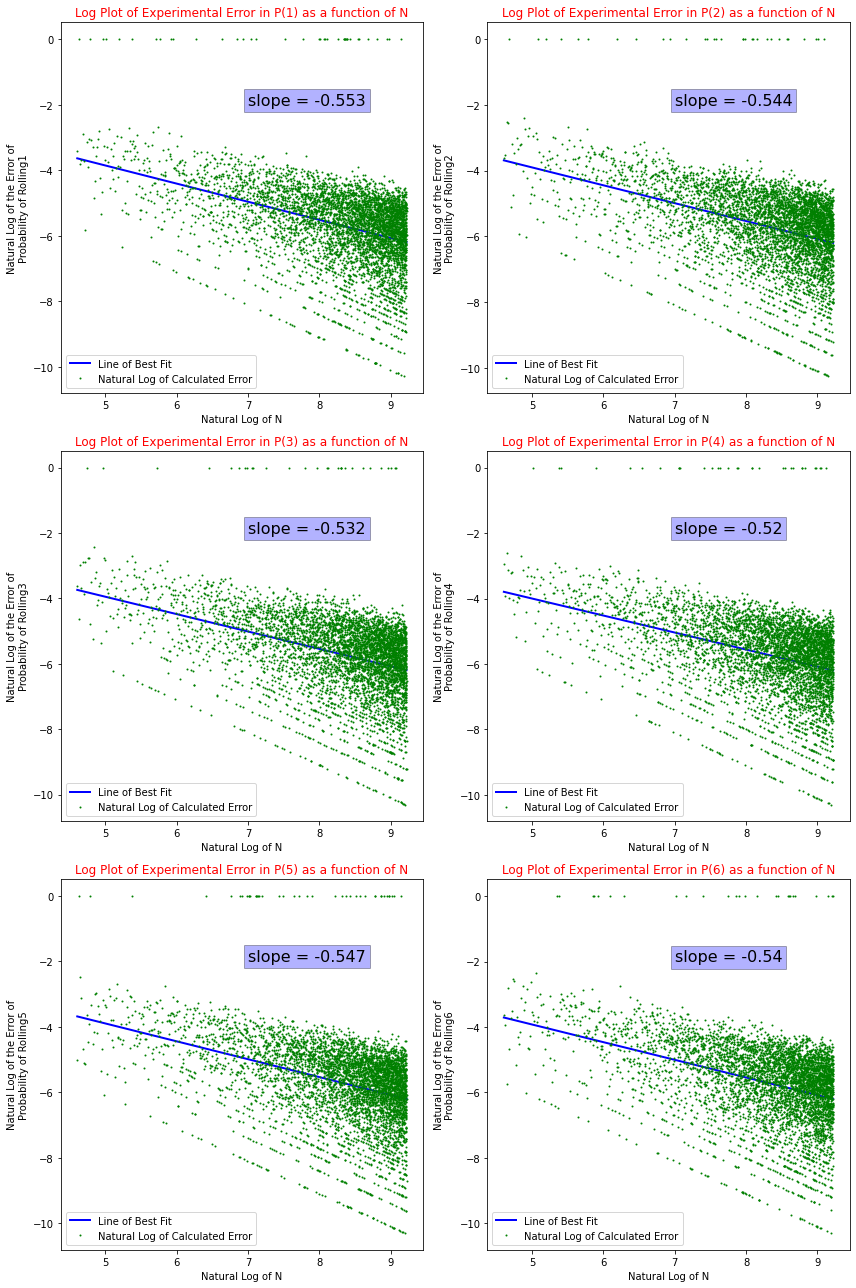

In [ ]:
# Plotting Instructions
fig, ax = plt.subplots(3,2,figsize=(12,18))
[axi.set_axis_off() for axi in ax.ravel()]

# Reinitializing N list that will hold the natural log of N as N progresses for plotting
N_list = []

# creating lists that will hold the natural log of the errors
error1, error2, error3, error4, error5, error6 = [],[],[],[],[],[]

dice = [1,2,3,4,5,6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]


# Initializing for loop that iterates over many values of N
for N in range(100,10100,2):

  # Same as last cell, creates a list of random dice rolls
  result = list(np.random.choice( dice , size = N , p = prob))

  # same as last cell, calculating experimental probabilities
  p1 = result.count(1) / N
  p2 = result.count(2) / N
  p3 = result.count(3) / N
  p4 = result.count(4) / N
  p5 = result.count(5) / N
  p6 = result.count(6) / N

  # This next part first checks if the error is equal to zero for the current iteration
  # If it is zero, then 0 is appended to the corresponding error list. Otherwise, the 
  # natural log of the error is appended instead. This is done for each of the six probabilities
  if abs((1/6) - p1) != 0:
    error1 += [math.log(abs((1/6) - p1))]
  else:
    error1 += [0]

  if abs((1/6) - p2) != 0:
    error2 += [math.log(abs((1/6) - p2))]
  else:
    error2 += [0]
  
  if abs((1/6) - p3) != 0:
    error3 += [math.log(abs((1/6) - p3))]
  else:
    error3 += [0]
  
  if abs((1/6) - p4) != 0:
    error4 += [math.log(abs((1/6) - p4))]
  else:
    error4 += [0]
  
  if abs((1/6) - p5) != 0:
    error5 += [math.log(abs((1/6) - p5))]
  else:
    error5 += [0]
  
  if abs((1/6) - p6) != 0:
    error6 += [math.log(abs((1/6) - p6))]
  else:
    error6 += [0]

  # Appends the natural log of the current N value to it's corresponding list
  N_list += [math.log(N)]

# creates a variable called slope sum that will be used to calculate the average slope 
# of all 6 fitted lines
slope_sum = 0

# plotting instructions, with added instructions to also plot the line of best fit using numpy
# polyfit. Also adds text with the slope of the fitted line to each graph
graphs = [np.array(error1), np.array(error2), np.array(error3), np.array(error4), np.array(error5), np.array(error6)]
N_list = np.array(N_list)
for i in range(1,7):
  line = [1/6] * len(graphs[i-1])
  ax = fig.add_subplot(3, 2, i)
  a, b = np.polyfit(N_list, graphs[i-1], 1)
  ax.plot(N_list, a*N_list + b, label="Line of Best Fit",linewidth=2,color='blue')
  ax.plot(N_list,graphs[i-1], 'go', markersize =1, label="Natural Log of Calculated Error")
  plt.xlabel("Natural Log of N")
  plt.ylabel( "Natural Log of the Error of\nProbability of Rolling" + str(i) )
  plt.title("Log Plot of Experimental Error in P("+str(i)+") as a function of N",fontsize=12,color='red')
  plt.legend()
  plt.text(7,-2,"slope = "+str(round(a,3)), fontsize=16, bbox=dict(facecolor='blue',alpha=0.3))
  plt.tight_layout()
  # adds each slope together
  slope_sum += a

# finds the average slope, and prints it
avg_slope = slope_sum / 6
print("")
print("Average Slope is:", round(avg_slope,3))
plt.show()

## **Problem 2.1.1 Results & Discussion**

From the graphs produced in both cells, we can easily analyze our results, and find that they correlate closely with what is expected for a problem such as this one.

In the first set of graphs, we can see that for smaller values of $N$ the probabilities of each face being present are quite spread apart. This is due to the fact that for a smaller sample size of random events, it is less likely that the experimental probability will be the same as that expected in theory. However, as $N$ gets large, we can see that the experimental probabilities for each face appear to converge towards the theoretical value of $1/6$, as is expected for larger sample sizes. Also from the first set of graphs, we can see that the error between the experimental and theoretical probability *apears* to fall off exponentially, although further testing, which we perform in the second code cell is required to confirm this.

In the second set of graphs, we confirm the suspicion that arose from the previous results, by plotting the log of the eroor versus the log of $N$. In the graphs, we can clearly see that a linear trend arises, which implies that the error does indeed decrease exponentially, as is expected. Specifically, by fitting a line to the data, and finding the slopes we can analyze the power of our relationship between error and $N$. On average, the program finds the average slope of all of the data to be $m\approx -0.5$. This implies that the power of our relationship is equal to -1/2, or in other words, the error is proportional to $N^{-1/2}$. Later on in the assignment, we will find that this is due the fact that this probability distribution is theoretically a normal distribution, but for now, these results are exactly what we would expect!


# **Problem 2.2.3 - Macrostate Probability of a Coin**

## **Problem 2.2.3 Methodology**

For this problem, I was tasked with first calculating the macrostate probability for a coin in Python, and then using this method to plot the macrostate probability as a function of the macrostates themselves, in my case the number of heads $n_1$. Finally, I also investigated how this function scales for different values of $N$, which is the total number of coinflips or the total number of states in the system.

Once again, I actually coded two cells for this problem, with the second one being the main bulk of the problem.

In the first cell, I created a very small program, just to get a better idea of macrostate probabilities. The program first intializes variables for $N$, the number of coin flips / states, as well as the probabilities of heads and tails, $P$ and $Q$, which for this coin, are equal. Then, once again using NumPy's random.choice function, the program creates a list of outcomes of $N$ coin flips. A variable $n_1$ is then created, and set equal to the number of flips that resulted in heads, in other words, our macrostate. After this, $\Omega$ is calculated according to the formula for the binomial coefficient, and finally, the macrostate probability for this specific macrostate is calculated and printed.

In the second cell, I employ similar methods to calculate macrostate probabilities, however I first define a function. Within this function the macrostate $n_1$ is first initialized to be one where zero heads are present, and two lists for keeping track of $N$ and the macrostate probability $P(N_1)$. Then, looping through all values from 1 to $N$, I calculate the current macrostate probability, append it to it's list along with the macrostate $n_1$, and then increase $n_1$ by 1. The function returns both of our lists, which will contain all of our macrostates, as well as all of our probabilities corresponding to each macrostate. By doing this, we are able to create plots of $P(n_1)$ versus $n_1$, and by coding this as a function that takes $N$ as an arguement, we can call it for different values of $N$ to see how it affects our plots. This is exactly what I do in the last chunk of code. However, before doing that I also define a function to create two lists that correspond to the $x$ and $y$ values of a Gaussian distribution. Specifically, the function takes $N$ as an arguement, and produces a Gaussian with a mean $\mu=N/2$, and a standard deviation $\sigma=\sqrt{N}/2$. The gaussian distribution is then created by iterating through many small steps in $x$ and calculating $y=f(x)$ according to the definition of the probability density function for a Gaussian.

After all of this is done, my code simply iterates through 4 different $N$ values, and for each one, plots the corresponding gaussian distribution as well as the macrostate probability distribution, so that we can compare the two.


## **Problem 2.2.3 Code**

In [ ]:
# This cell is just an initial example of calculating the macrostate probability for a coin
# It "flips" a coin 100 times, compiles all the results, and then based on how many times the
# coin landed heads, the probability of that macrostate is calculated.

# Setting number of coin flips to be 100 and the probability of head and tails to each be 0.5
N = 100
P,Q = 1/2,1/2

# Uses numpy random to flip the coin 100 times, and create a list of the results
outcome = np.random.choice(["H","T"], size = N, p = [P,Q])
# Sets a variable called n_1 to be the number of times the coin landed heads
n_1 = np.count_nonzero(outcome == "H")

# Calculates omega, the number of ways that the microstates can be distributed 
# in the given macrostate. Then calculates the macrostate
omega = int((factorial(N)) / ( (factorial(n_1))*(factorial(N-n_1)) ))
P_macro = omega*(P**n_1)*(Q**(N-n_1))

print("For n_1 =",n_1)
print("Macrostate Probability is:",P_macro)

For n_1 = 51
Macrostate Probability is: 0.07802866410507722


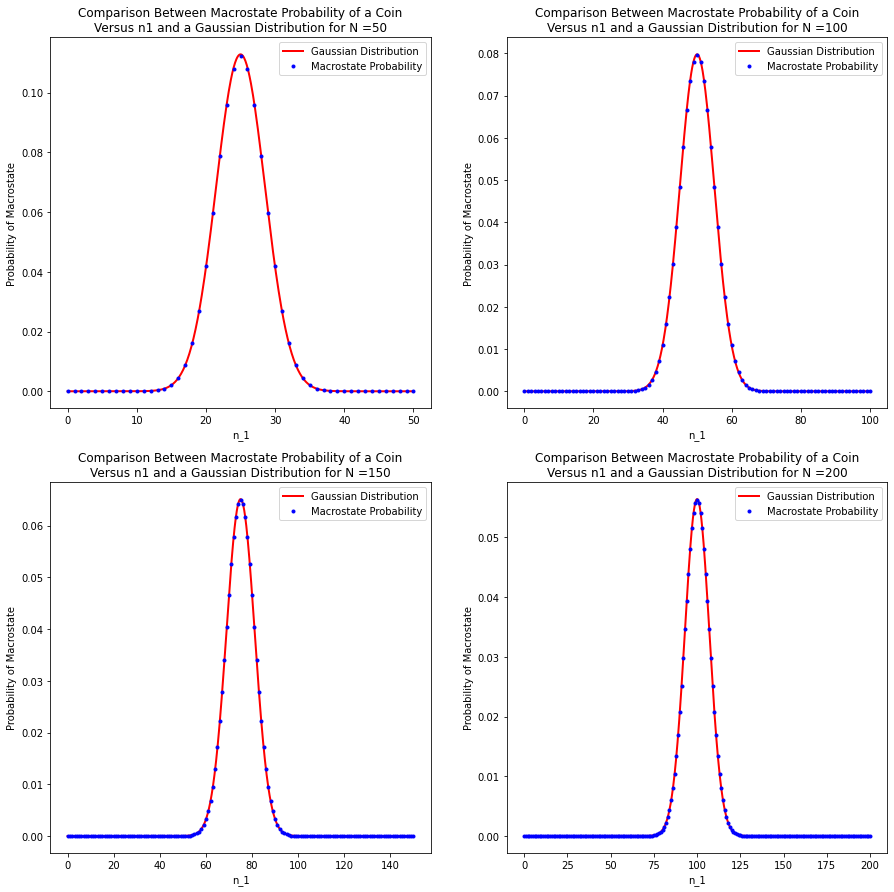

In [ ]:
# This cell will calculate ALL of the macrostate probabilities of a coin, and plot them
# versus the number of events (heads) present in each macrostate. It also plots a gaussian
# distribution for comparison


# First defining a function called macrostate that takes arguements N, P, and Q. N is the number of coin flips, 
# P and Q are the probabilities of heads and tails. The function first reates two lists, to
# keep track of the macrostate probability and the current n_1 that it corresponds to
# Next, it iterates N times, using the same method to calculate the macrostate probability as in the
# last cell. For each iteration, it appends the probability and current n_1 to their respective lists
# and finally updates n_1 (increases by 1). It returns the two lists, to be used for plotting
def macrostate(N,P,Q):
  n_1 = 0
  P_list = []
  n1_list = []
  for i in range(N+1):
    omega = int((factorial(N)) / ( (factorial(n_1))*(factorial(N-n_1)) ))
    P_macro = omega*(P**n_1)*(Q**(N-n_1))
    P_list.append(P_macro)
    n1_list.append(n_1)
    n_1 += 1
    
  return(P_list,n1_list)

# Defines a simple function to create a Gaussian distribution for plotting. It
# takes N as an arguement, and creates a mean variable of N/2 and a stddev variable of sqrt(N)/2
# then it iterates many times, updating x each time and calculating y based on the formula for
# a gaussian distribution. It then returns the lists of x and y values, to be used for plotting
def gaussian(N):
  mu = N/2
  sigma = sqrt(N)/2
  x = 0
  x_list = []
  y_list = []
  for i in range(10*N+1):
    y = ( 1 / (sqrt(2*pi*sigma**2))) * exp(-(x-mu)**2 / (2*sigma**2))
    x_list.append(x)
    y_list.append(y)
    x += 0.1

  return(x_list,y_list)

# Setting up plots and giving values to P and Q
fig, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()
P = 1/2
Q = 1 - P

# for loop that iterates 4 times, this is so we can vary N
for i in range(4):
  # sets new values for N
  N = i*50 + 50
  # uses the macrostate function to create two lists
  Ps, n1s = macrostate(N,P,Q)
  # uses the gaussian function to create two more lists
  X, Y = gaussian(N)
  # plots the experimental macrostate probabilities as blue dots, over top of the red gaussian distribution
  axs[i].plot(X,Y,color='red',linewidth = 2, label="Gaussian Distribution")
  axs[i].plot(n1s, Ps,"bo",markersize=3, label = "Macrostate Probability")
  axs[i].set_title("Comparison Between Macrostate Probability of a Coin\nVersus n1 and a Gaussian Distribution for N ="+str(N))
  axs[i].set_ylabel("Probability of Macrostate")
  axs[i].set_xlabel("n_1")
  axs[i].legend()

## **Problem 2.2.3 Results and Discussion**

From our resulting graphs, we can see some interesting behaviour of the macrostate probability density function. Immediately, we observe that it is almost identical to that of the corresponding Gaussian distribution that scales like $\sqrt{N}$. This tells us that the macrostate probability function is very well approximated by this Gaussian, as expected. 

We can also see that the macrostate probability peaks at $n_1=N/2$. Given that we expect the most probable outcomes of the macrostate to be dictated by the theoretical probability of 1/2, this is entirely expected. We can see that for larger values of $N$ the distribution gets narrower around this theoretical probability, which again makes sense, as for a larger sample size we expect the experimental probability to approach the theoretical probability.

The fact that the Gaussian that scales like $\sqrt{N}$ matches up with our probability distribution also further confirms our conclusion from the previous problem, that the error between the theoretical and experimental probabilities is proportional to $N^{-1/2}$.

# **Problem 2.3.1 - Lossless Image Compression**

## **Problem 2.3.1 Part A-B Methodology**

In the first two parts of this problem, I was given several tasks, all of which are done in the below code cell. First I had to load the image 'creek_pic.tif' in and use Python to convert it to grayscale. After doing this, I had to obtain the relative abundance of pixels with each byte value from 0 (black) to 255 (white). After doing this, the next step was to convert the file to a different format, for which I opted for JPEG, and complete some analysis for the purpose of comparing the two sets of image data. 

To begin these tasks, I started by creating a variable called img, and assigned to it the original data, using 
OpenCV's cv2.imread function. Since I was working in Google Colab, before running the code, I would upload the image creek_pic.tif to my current colab space. That way, I simply call the cv2.imread function and pass the image's name into the path arguement, and the image is read in to the variable. Notice, to immediately convert the image to grayscale, I passed 0 (corresponding to greyscale) into the function's flag arguement. Next, I used the function cv2.calcHist on the img variable which returns a list of values that correspond to the number of pixels in the image with each bit value, from 1 to 255. For the purpose of visualization, I used matplotlib.pyplot to output a plot of this histogram. 

Before listing all of the byte values, I moved on to analyzing the converted image format, such that I could do a more direct comparison between the two. To convert the image, I simply used the cv2.imwrite function, to take the original greyscale image data, convert it to JPEG file, and save it in my colab workspace as 'creek_image.jpg'. After this is done, I imeddiatly read the JPEG image data in using the same method as for the .tif image, and set it equal to a new variable. Repeating the previous steps with this new image data, I calculate and plot the new histogram.

After all of this is done, and we have obtained graphs of the two image histograms, I begin comparing the sizes, and relative byte values of each image. To do so, I start by defining two variables, byte_count and byte_count_jpg, to be equal to zero. These are just to count the total numner of bytes making up each image. After this, I begin a loop that iterates through all possible byte values. Within each iteration, the current byte value is printed, along with the number of pixels in each of the images that correspond to that byte value. This is done quite simply, by indexing each of the two histogram lists that were previously created, as each index of those lists holds the number of pixels corresponding to the byte value of the index. At the end of the loop iteration, I also add the number of pixels of each image for that specific index, to their respective counter lists. That way, when the loop is complete, the counter variables each hold the total size of each image.

Within my code, I also added some print statements involving formatting, such that the output appears to be a table in which we can easily compare the amount of each byte value that is present in each image. Finally, the image also prints the total size of each image, in kB, for comparison.

Additionally, I added a block of code at the end of the program, which calculates the Shannon Entropy of each image data. This is done simply using the definition of Shannon Entropy, taking the sum in a for loop, where the probability of each byte value is just the number of pixels corresponding to that byte value divided by the total number of pixels. Shannon entropy is further explored in the final part of this problem, but is also useful here to get some insight and results.

## **Problem 2.3.1 Part A-B Code**

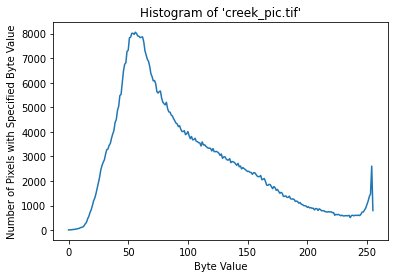

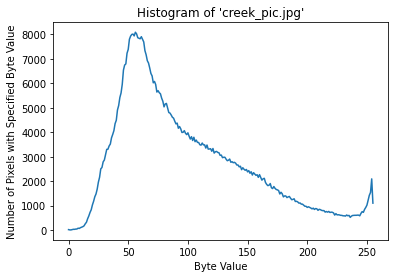


Byte Value		Pixels in .tif Image	Pixels in .jpg Image
	  0 			 10 				 19
	  1 			 12 				 8
	  2 			 10 				 7
	  3 			 18 				 21
	  4 			 33 				 32
	  5 			 28 				 31
	  6 			 46 				 41
	  7 			 51 				 44
	  8 			 65 				 77
	  9 			 72 				 68
	  10 			 105 				 99
	  11 			 114 				 122
	  12 			 130 				 140
	  13 			 179 				 174
	  14 			 259 				 256
	  15 			 317 				 320
	  16 			 462 				 465
	  17 			 563 				 579
	  18 			 719 				 722
	  19 			 833 				 830
	  20 			 1004 				 1028
	  21 			 1197 				 1177
	  22 			 1309 				 1361
	  23 			 1488 				 1474
	  24 			 1699 				 1673
	  25 			 1925 				 1959
	  26 			 2153 				 2158
	  27 			 2445 				 2501
	  28 			 2624 				 2559
	  29 			 2761 				 2788
	  30 			 2860 				 2863
	  31 			 3087 				 3073
	  32 			 3274 				 3299
	  33 			 3299 				 3305
	  34 			 3450 				 3438
	  35 			 3528 				 3515
	  36 			 3739 				 3770
	  37 			 3912 				 3908
	  38 			 4051 				 4063
	  39 			 4386 				 4351
	  40 			 4501 			

In [ ]:


# This cell reads in a .tif image in greyscale. It then plots the histogram of the image.
# Next, it converts the .tif image to a .jpg image, and plots the corresponding histogram.
# Finally, it prints the number of pixels of each byte value for each image side by side
# for comparison, as well as the total bytes.

# Reads the image data into a variable called img, with parameter 0 denoting greyscale
img = cv2.imread('creek_pic.tif',0)

# Creates a histogram of the .tif image
histg = cv2.calcHist([img],[0],None,[256],[0,256]) 

# Plotting the histogram of the .tif image
plt.plot(histg)
plt.title("Histogram of 'creek_pic.tif'")
plt.xlabel("Byte Value")
plt.ylabel("Number of Pixels with Specified Byte Value")
plt.show()

# Writes a .jpg image file of the original image data, and then reads it into a new variable
cv2.imwrite('creek_pic.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY),95])
img_jpg = cv2.imread('creek_pic.jpg', 0)

# Creates a histogram of the .jpg image
histg_jpg = cv2.calcHist([img_jpg],[0],None,[256],[0,256]) 

# Plots the histogram of the .jpg image
plt.plot(histg_jpg)
plt.title("Histogram of 'creek_pic.jpg'")
plt.xlabel("Byte Value")
plt.ylabel("Number of Pixels with Specified Byte Value")
plt.show()

# creates two variables that will be used to count the number of bytes in each image
byte_count = 0
byte_count_jpg = 0
print("")
print("Byte Value\t\tPixels in .tif Image\tPixels in .jpg Image")
# initializes for loop that iterates through each possible byte value
for i in range(0,256):
  # Prints out the current byte value, as well as the number of pixels of that byte value
  # contained in each image data, using indexing of the histogram
  print("\t ",i,"\t\t\t",int(histg[i]),"\t\t\t\t",int(histg_jpg[i]))
  # Updates the number of bytes
  byte_count += int(histg[i])
  byte_count_jpg += int(histg_jpg[i])

# Printing the final byte counts, and converts them to kB
print("")
print("The .tif image is "+str(byte_count)+" bytes or "+str(byte_count/1000)+" kB.")
print("The .jpg image is "+str(byte_count_jpg)+" bytes or "+str(byte_count_jpg/1000)+" kB.")
print("")


# Calculates the Shannon entropy of each dataset, by calculating the probability of each byte values for
# each of the two images, and taking the entropy to be the negative of the sum of all of the products of
# the probabilities of each byte value and the natural log of the probabilities
tif_pixels = byte_count
jpg_pixels = byte_count
tif_entropy = 0
jpg_entropy = 0
for i in range(0,256):
  tif_entropy -= (int(histg[i]) / tif_pixels) * math.log(int(histg[i]) / tif_pixels,2)
  jpg_entropy -= (int(histg_jpg[i]) / jpg_pixels) * math.log(int(histg_jpg[i]) / jpg_pixels,2)

# Printing the Shannon entropy
print("Shannon Entropy of .tif Image:",tif_entropy)
print("Shannon Entropy of .jpg Image:",jpg_entropy)

## **Problem 2.3.1 Part A-B Results & Discussion**

Immediately when viewing the results, we can see that the .tif and .jpg images are both the same size overall, about 700 kB. Initially, this may lead one to think that the image data is identical, however by analyzing the amount of pixels corresponding to each byte value, we see that that is not the case. Each of the images have different numbers of pixels corresponding to nearly all of the byte values. So, although the images are the same size, they are composed of different pixel elements.

One very interesting result of this program, is in regards to the Shannon entropy of each image data. From the final two print statements, we can see that the Shannon entropy of the .til file is slightly smaller than that of the .jpg file. The exact meaning behind this is explored more in depth in the final part of this problem, but for now, all we need to know is that the Shannon entropy corresponds to a lower limit of how small the size of an image can be compressed *without losing any information* about the image. 

Given that the two images are the exact same overall size, but have different Shannon entropies, we can deduce that different file types have different thresholds to which they can be compressed. This is why it is more optimal to store files as certain file types, as it can preserve more space! 

Also, given that the Shannon entropy of the .til file is slightly smaller than that of the .jpg file, we can come to the conclusion that as the images are composed in *this* program, the .til file could *theoretically* be compressed to a slightly smaller size than the .jpg file without losing any data. However, it important to note that the Shannon entropy is a theoretical lower bound, and in reality, is rarely actually achievable by computation; since the difference in Shannon entropies are very small for these two datasets, the *actual* extent to which the .til file could be compressed more is likely negligible. Nonetheless, it is an interesting result that gives us insight in to the fact that different file types have the potential to be compressed to smaller sizes than others!

## **Problem 2.3.1 Part C Methodology**

For the final part of this assignment problem, I was tasked with writing an algorithm that employed a Huffman encoding scheme centred around the relative amount of pixels corresponding to each byte value in the original .til image, in order to obtain an improved digital representation of the image data. Specificially, my code creates a binary representation of each pixel value, and prints them all. After completing this task, I also had to use Python to complete some analysis in regard to the new image, as well as compare the results to some theoretical concepts.

The basic idea behind how I could employ Huffman coding to compress the image data is in relation to the probability of a certain byte value being present in the image. Specifically, by assigning a binary number to represent each of the byte values, and making sure that the byte values corresponding to the highest number of pixels were represented by the shortest binary numbers, I could essentially end up with an encoded binary sequence representing the image data. Then, using the average length of the resulting "bitstrings" (binary strings representing each byte) I could calculate the size of the encoded image.

In terms of coding this program, I started off by once again reading in the .tif image data to a variable, in greyscale. I also created a histogram using the same previous method, in order to get all of quantities for each byte value. After this, I created a chunk of code that first changed the data in the histogram to a dictionary called VALUES, and then used a couple lines to convert it such that it was sorted by ascending number of occurances, as well as in the format where the keys of the dictionary (the byte values) were strings, and the values of the dictionary (the number of occurances of each byte value) were integer types. VALUES is then converted into a list of tuples. After this, I recalculated the number of pixels (or number of bytes) in the image, so that I could calculate the "probabilities" (number of occurances of a byte value divided by total number of bytes) for each byte value. In doing this, I created a similar dictionary to that of VALUES, which contained all the probabilities, again in ascending order, and called it og_probs_list. Then, once again, this dictionary is converted to a list of tuples.

The next part of my code involves setting up, and executing the actual Huffman coding scheme. Originally, I attemped to do this solely using lists and numpy arrays, but in testing this I found that my average bitstring length actually ended up being larger than 8 bits, which implies that the encoded image data was actually larger than the original image. Clearly, I needed a new strategy, which arose after doing some reading online that reccomended employing some object oriented coding. This route ended up working extremely well, and allowed me to create an efficient Huffman algorithm.

To begin, the program starts by creating a class called node_tree(object), in which the object to be used as an arguement and therefore "created" is a node, which is later defined. Essentially, the Huffman algorithm travels up our list of probabilities, combining each of the two lowest probabilities under the byte value number that is higher of the two; this is repeated until we break down our probabilities into only two byte values, each with a probabilitiy. One of these byte values is the original one of highest probabilities $P_H$, and the other one is that of the second highest *original* probabilities, who now has probability equal to $1-P_H$. From here, we assign the shortest binary to the highest probability byte value, and then move on to the other byte value, who is composed of it's two preceeding (we will call child) probabilities. Then, we create new binary characters, of shortest possible length, and repeat this process. Essentially, we are going backwards to split up each of the byte values back to the originals (each split is called a node), and then assigning binaries for each split. This is a little bit tough to explain in words, however the concept of trees and nodes is useful, and should help to follow along in my code, which is also commented.

After we have our node_tree class defined, we define our tree function, which will take the nodes (the byte values) as an arguement. This is the function that will assign the binary strings to each of the byte values, according to the Huffman coding algorithm detailed above. When the function is ran, it returns a dictionary whose keys are the byte values, and values are the corresponding binary strings.

After we have defined everything, we must set up our nodes and encode them. To do this, I create an actual variable called nodes, and set it equal to the previously created VALUES list. Remember that this is essentially a 2D array, as it is a list of tuples. Once this is done, we begin the process of working up the list until we have only one node, representing the top of our tree, which is done by iterating a while loop until the length of our nodes list is equal to one. Within this while loop is where we take advantage of our previously defined class. For each iteration we manipulate the nodes according to the Huffman algorithm, and then use our class to give this node the properties that we defined earlier, such as having left and right children nodes and/or a parent node. This allows us to preserve our data and it's order.

Finally, now that are tree of nodes is built, we can execute the actual encoding part of the Huffman algoritm. We call our tree function on our newly constructed tree of nodes, which acts to go down the tree, starting with our higher probability nodes, and assign binary strings that increase in complexity. The result of this is a dictionary which contains all of our original byte values, along with their corresponding binary strings, which decrease in complexity as probability increases. Since this is essentially our final results, we set it equal to a variable called bins, which will be used to store our results.

After this, the remainder of the program employs two loops: one to calculate the average bitstring length and size of our new data, and one to calculate the Shannon Entropy of our original data. Once this is done, all relevant results are printed.


## **Problem 2.3.1 Part C Code**

In [ ]:
# This cell implements a Huffman coding scheme, to compress image data. It assigns
# calculates the probability of each byte value being in the .til image, and then orders
# these probabilities. Then, as is routine in Huffman coding, it uses an algoriothm to assign
# binary numbers to each byte type, with the largest probabilities having the shortest binarys.
# Finally, it calculates several stats in regards to the image data size before and after compression
# as well as the theoretical smallest size according to Shannon's Theorem.


# reads in the .tif image and creates a histogram as in the last cell
img = cv2.imread('creek_pic.tif',0)
histg = cv2.calcHist([img],[0],None,[256],[0,256]) 


# creating a dictionary whose keys are the pixel values, and values are the 
# corresponding number of those pixel values that are present>
# After this dict is created it is sorted in ascending order, and a list called VALUES is created
# which is essentially a different form of the same dictionary, instead using tuples
value_dict = {}
for i in range(0,256):
  value_dict[i] = int(histg[i]) 

value_dict = dict(sorted(value_dict.items(), key=lambda item: item[1]))
VALUES = sorted(value_dict.items(), key=lambda x: x[1])
value_dict = {str(key): value for key, value in VALUES}
VALUES = sorted(value_dict.items(), key=lambda x: x[1])

# flattens the image, and sets a variable called pixels to hold the length 
# of the flattened image (total number of pixels)
flat_img = img.flatten().tolist()
pixels = len(flat_img)

# creates a dictionary of the probabilities by dividing each value in our original
# dictionary by the total number of pixels
probs = {key: value / pixels for key, value in value_dict.items()}
# creates a list that only contains the probability values in ascending order
og_probs_list = list(probs.values())


# creates a class called node_tree, which takes object as an arg
class node_tree(object):
  # Initializes self to assign left and right to corresponding properties
  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right
  # defining children and nodes, according to left and right, so that each node
  # will have children properties of left and right. This is so we can build our
  # huffman tree
  def children(self):
    return (self.left, self.right)
  def nodes(self):
    return (self.left, self.right)


# Defining our tree function. This is the main function that will act on our nodes
# to produce binary numbers for each of the byte values
def tree(node, left=True, binString=''):
  if type(node) is str:
    return {node: binString}
  (l, r) = node.children()
  d = dict()
  d.update(tree(l, True, binString + '0'))
  d.update(tree(r, False, binString + '1'))
  return d

# creates out nodes list, which is the already sorted list of values
nodes = VALUES

# intializes while loop that will iterate until we have broken down our nodes
# list to just 1 value
while len(nodes) > 1:
  # Updating our nodes list according to the Huffman encoding algorithm, where
  # the values with the two lowest probabilities are combined
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = node_tree(key1, key2)
  nodes.append((node, c1 + c2))

  #sorts our final nodes list in reverse to preserve original order
  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

# Calling our tree function on our final nodes list, to assign binary numbers to each
# byte value according to the specified huffman procedure
bins = tree(nodes[0][0])

# Calculates the average bitstring length, by iterating through values, calculating each probabilitiy
# and taking the sum of the product of the probability and the number of bits for each value
avg_bits = 0
for value, occurances in VALUES:
  prob = occurances / pixels
  avg_bits += prob*len(bins[value])

# calculates the Shannon entropy of our originaly image according to it's definition
shannon = 0
for q in range(len(og_probs_list)):
  shannon -= og_probs_list[q] * math.log(og_probs_list[q], 2)



# Calculating and printing final results
print("R E S U L T S")
print("--------------")
print("--------------")
print("Minimum Average Bitstring Length by Shannon's Theorem:",round(shannon,5),"bits")
print("Average Bitstring Length of Huffman Encoded Image:",round(avg_bits,5),"bits")
print("")
print("Original Image Size:",pixels*8 / (8*1000),"kB")
print("Smallest Possible Image Size by Shannon's Theorem:",round(shannon*pixels/(8*1000),3),"kB")
print("New Image Size After Huffman Encoding:",round(avg_bits*pixels/(8*1000),3),"kB")
print("----------------------------------------------")
for i in range(256):
  print("Pixel Value: ",i,"\t","Binary Code:", bins[str(i)])

R E S U L T S
--------------
--------------
Minimum Average Bitstring Length by Shannon's Theorem: 7.55674 bits
Average Bitstring Length of Huffman Encoded Image: 7.59186 bits

Original Image Size: 700.5 kB
Smallest Possible Image Size by Shannon's Theorem: 661.687 kB
New Image Size After Huffman Encoding: 664.762 kB
----------------------------------------------
Pixel Value:  0 	 Binary Code: 1101010000010101
Pixel Value:  1 	 Binary Code: 000101011000100
Pixel Value:  2 	 Binary Code: 1101010000010100
Pixel Value:  3 	 Binary Code: 000101011000101
Pixel Value:  4 	 Binary Code: 00010101100011
Pixel Value:  5 	 Binary Code: 110101000001011
Pixel Value:  6 	 Binary Code: 11010100000100
Pixel Value:  7 	 Binary Code: 0001010110000
Pixel Value:  8 	 Binary Code: 0101001011010
Pixel Value:  9 	 Binary Code: 0101001011011
Pixel Value:  10 	 Binary Code: 1101010000011
Pixel Value:  11 	 Binary Code: 000101011001
Pixel Value:  12 	 Binary Code: 010100101100
Pixel Value:  13 	 Binary Code: 11

## **Problem 2.3.1 Part C Results & Discussion**

As is evident in the printed results from the above cell, this program succesfully implements a Huffmman encoding scheme to compress the size of the image data. To summarize the results that are printed at the top of the output, by Shannon's theorem, the minimum average bitstring length needed to encode this data is 7.55674 bits, whereas the average bitstring length of our resulting data is 7.59186 bits. Clearly, our mean bitstring length is quite close to the lower bound set by Shannon's theorem. Using the mean bitstring length, and the number of bits needed to recreate the image without losing any data (must recreate every pixel of original image) we can calculate the total image size.

By Shannon's theorem, the image can theoretically be reduced from 700.5 kB to 661.687 kB. Using our program we were able to reduce the image data from 700.5 kB to 664.763 kB. Considering that it is likely impossible to computationally achieve the lower limit set by Shannon's entropy, at least for our purpose, this algorithm is likely as effiecient as it can be, as we were able to get reduce the image by 92.1 % of what is *theoretically* possible.

Comparing these results to those obtained in part A and B of this problem, we find that despite the fact that we have preserved all quantities of each byte value, we were able to reduce the image to a size close to that of the bound calculated previously for the .tif image format. Recall that the bound was slightly higher for the .jpg image format, so if we ran this program for the JPEG format instead, we can predict that the resulting encoded image data would be *slightly* larger than the result we achieved for the .tif file.

Overall, we have succesfully endoded the image data into a string of binary, that can be used to store the data. We could then create a program to decode the binary, using the corresponding image values, and we would save roughly 36 kB, without losing any data.

# **Conclusion**

Overall this assignment allowed me to explore many different topics such as randomness, entropy, image compression, and Huffman endcoding. I was able to succesfully adress all of the outcomes that were outlined in the intro, produce many valuable results, and get a very deep insight into these topics.

Spefically, in problem 2.1.1, I was able to get some initial insight into the fact that distributions of random variables can very often be modelled by well known probability density functions. By creating several graphs, and calculating properties of the fitted data from these graphs, I was able to find that the error of the experimental probability for a dice roll was inversely proportional to the square root of the number of dice rolls, as well as adress several other outcomes along the way.

In problem 2.2.3, I was able to analyze some properties of macrostates, macrostate probabilities, and probability theory in general. Overall I was able to link this to our original hope for the problem, by finding futher evidence towards the link between probability error and the square root of the number of random variables that were involved. This led to an ability to find a link between functions of macrostate probability, and the well known Gaussian distribution.

Finally, in problem 2.3.1, I was able to do a very deep dive into topics involving image compression, entropy, and Huffman encoding. This was by far the largest of the assignment problems, but it allowed me to gain a very good understanding of these topics. My results were extremely consistent with what was expected, so I concluded that I was able to create a very efficient algorithm. The results also allowed me to compare between theoretical and experimental results, pertaining to different types of data file types. Not only this, but as a bonus, I was also able to learn about and employ some object oriented programming for the first time, which I believe will be extremely useful in the future.

Overall, this assignment covered many different topics, but in completing all of my objectives, I was able to find that the results did a great job of linking everything together.